### Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Importing dataset

In [2]:
df=pd.read_csv('gaanasongs.csv')

In [3]:
###

In [4]:
df.head()

,name,singer,singer_id,duration,link,language
0,Dil - E - Nadan Tujhe,Chitra Singh|Jagjit Singh,/artist/chitra-singh|/artist/jagjeet-singh-1,05:00,/dil-e-nadan-tujhe-3,Urdu
1,Agar Hum Kahen Aur Woh Muskara De,Chitra Singh|Jagjit Singh,/artist/chitra-singh|/artist/jagjeet-singh-1,06:26,/agar-hum-kahen-aur-woh-muskura-den,Urdu
2,Unke Dekhe Se,Jagjit Singh,/artist/jagjeet-singh-1,03:41,/unke-dekhe-se,Urdu
3,Yeh Na Thi Hamari Qismat - Chitra Singh,Chitra Singh,/artist/chitra-singh,04:26,/yeh-na-thi-hamari-qismat-2,Urdu
4,Hazaron Khwahishen Aisi,Jagjit Singh,/artist/jagjeet-singh-1,05:39,/hazaron-khwahishen-aisi-1,Urdu


In [5]:
df.shape

(41355, 6)

#### 1) Check for null values

In [6]:
# There are no null values in dataset
df.isnull().sum()

name         0
singer       0
singer_id    0
duration     0
link         0
language     0
dtype: int64

#### 2)Dealing with duration

In [7]:
# We can see the duration's datatype is object
df.dtypes

name         object
singer       object
singer_id    object
duration     object
link         object
language     object
dtype: object

In [8]:
df['duration'].head()

0    05:00
1    06:26
2    03:41
3    04:26
4    05:39
Name: duration, dtype: object

In [9]:
# We want to convert duration in minutes to seconds
l1=[]

for i in df['duration']:
    minutes=int(i.split(":")[0])
    seconds=int(i.split(":")[1])
    ans=minutes*60+seconds
    l1.append(ans)
    

In [10]:
df['duration']=l1

In [11]:
# Here we can see that duration is now converted into seconds
df.head()

,name,singer,singer_id,duration,link,language
0,Dil - E - Nadan Tujhe,Chitra Singh|Jagjit Singh,/artist/chitra-singh|/artist/jagjeet-singh-1,300,/dil-e-nadan-tujhe-3,Urdu
1,Agar Hum Kahen Aur Woh Muskara De,Chitra Singh|Jagjit Singh,/artist/chitra-singh|/artist/jagjeet-singh-1,386,/agar-hum-kahen-aur-woh-muskura-den,Urdu
2,Unke Dekhe Se,Jagjit Singh,/artist/jagjeet-singh-1,221,/unke-dekhe-se,Urdu
3,Yeh Na Thi Hamari Qismat - Chitra Singh,Chitra Singh,/artist/chitra-singh,266,/yeh-na-thi-hamari-qismat-2,Urdu
4,Hazaron Khwahishen Aisi,Jagjit Singh,/artist/jagjeet-singh-1,339,/hazaron-khwahishen-aisi-1,Urdu


#### 3)Find average duration of the songs

In [12]:
avg=df['duration'].mean()

In [13]:
print("in seconds:",avg)
print("in minutes:",avg/60)

in seconds: 295.3130697618184
in minutes: 4.921884496030306


#### 4)How many languages of songs are in the dataset

In [14]:
df.language.value_counts()

Telugu        4996
Hindi         4993
Old           4993
Marathi       4699
Tamil         4677
Punjabi       3818
Kannada       3559
Urdu          3116
Gujarati      2115
Bengali        958
Odia           940
Assamese       724
Rajasthani     541
Bhojpuri       519
Malayalam      479
Haryanvi       228
Name: language, dtype: int64

In [15]:
print("there are :",len(df.language.value_counts()),"langauges in dataset")

there are : 16 langauges in dataset


<AxesSubplot:xlabel='language', ylabel='count'>

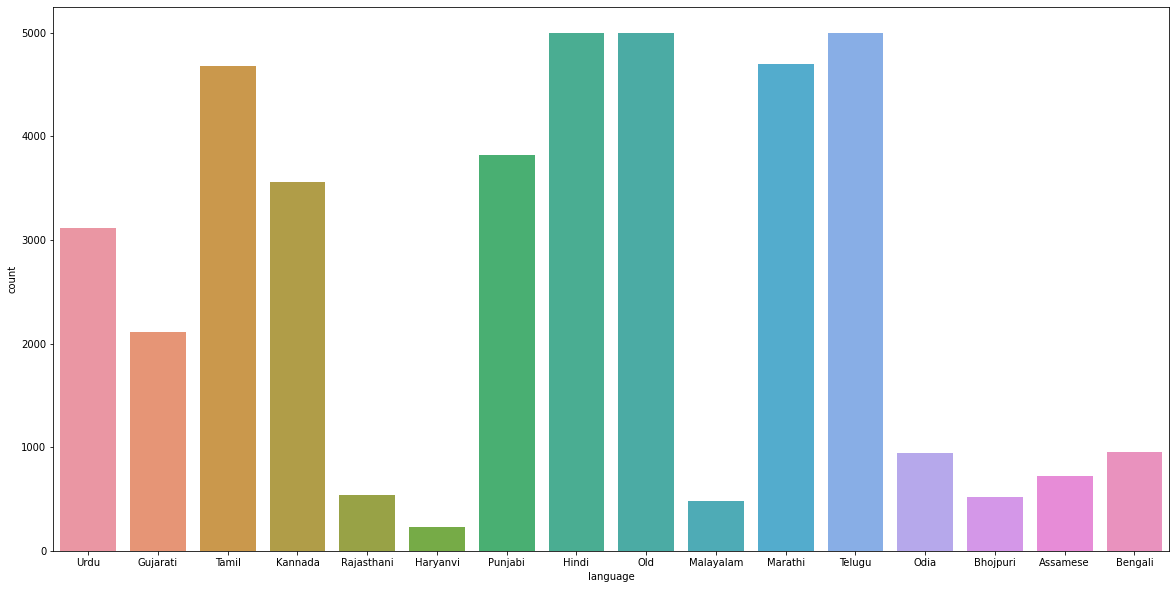

In [16]:
plt.figure(figsize=(20,10))
sns.countplot(x='language',data=df)

#### 5)How many punjabi songs are there

In [17]:
df.language.value_counts()
# We can see that there are 3818 punjabi songs

Telugu        4996
Hindi         4993
Old           4993
Marathi       4699
Tamil         4677
Punjabi       3818
Kannada       3559
Urdu          3116
Gujarati      2115
Bengali        958
Odia           940
Assamese       724
Rajasthani     541
Bhojpuri       519
Malayalam      479
Haryanvi       228
Name: language, dtype: int64

In [18]:
# another way
su=0
for i in df['language']:
    if i=='Punjabi':
        su+=1
print("there are:",su,"punjabi songs in the dataset")    

there are: 3818 punjabi songs in the dataset


#### 6)Find number of songs in each language

In [19]:
df.language.value_counts()

Telugu        4996
Hindi         4993
Old           4993
Marathi       4699
Tamil         4677
Punjabi       3818
Kannada       3559
Urdu          3116
Gujarati      2115
Bengali        958
Odia           940
Assamese       724
Rajasthani     541
Bhojpuri       519
Malayalam      479
Haryanvi       228
Name: language, dtype: int64

#### 7)find average duration of songs in each language

In [20]:
for i in df['language'].unique():
    print(i, int(df[df['language'] == i]['duration'].mean()))

Urdu 407
Gujarati 271
Tamil 270
Kannada 250
Rajasthani 291
Haryanvi 320
Punjabi 324
Hindi 307
Old 307
Malayalam 242
Marathi 281
Telugu 279
Odia 257
Bhojpuri 357
Assamese 228
Bengali 255


#### 8) Find how many unique singers in the dataset

In [21]:
l2=[]
for i in df['singer']:
    l2+=i.split('|')
s1=set(l2)
print(len(s1))    

3940


#### 9)Find out logest song in dataset

In [22]:
df.duration.describe()

count    41355.000000
mean       295.313070
std        218.524804
min         17.000000
25%        204.000000
50%        260.000000
75%        323.000000
max       3595.000000
Name: duration, dtype: float64

In [23]:
df[df['duration']==3595.000000].index.values

array([818], dtype=int64)

In [24]:
# Here you can see longest song in dataset
df.iloc[[818]]

,name,singer,singer_id,duration,link,language
818,Yeh Paisa Kya Karega,Aziz Miyan Qawwal,/artist/aziz-miyan-qawwal,3595,/yeh-paisa-kya-karega-2,Urdu


### Find out smallest song in dataset

In [25]:
df[df['duration']==17.000000].index.values

array([22952, 27945, 35561], dtype=int64)

In [26]:
df.iloc[[22952, 27945, 35561]]

,name,singer,singer_id,duration,link,language
22952,Dialogues (Ghulami): Aahi Jaana Mere Liye,Ost,/artist/ost,17,/dialogue-aahi-jana-mere-liye,Hindi
27945,Dialogues (Ghulami): Aahi Jaana Mere Liye,Ost,/artist/ost,17,/dialogue-aahi-jana-mere-liye,Old
35561,Title Musics - Jagadekaveeruni Katha,Gurucharan,/artist/gurucharan,17,/title-musics,Telugu
